### Identifying Categorical/Qualitative Variable types:

Categorical/Qualitative Variables: These are variables that represent categories or groups
gender: Categorical (1 = Male, 2 = Female)
family: Categorical (Represents family size, could be discrete)
education: Categorical (Represents the level of education)
sat_management, sat_colleques, sat_workingEnvironment: Ordinal categorical

### Identifying Numerical/Quantitative Variables Variable types:

Numerical/Quantitative Variables: These are variables that represent numerical values.
age: Continuous numerical
years_of_service: Discrete numerical
salary: Continuous numerical

### Descriptive Statistics:

In [2]:
import pandas as pd

file_path = r"WorkPlaceSatisfactionSurveyData.xlsx"

df = pd.read_excel(file_path)

df.describe()



,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
count,82.000000,82.000000,82.000000,82.000000,81.000000,80.000000,82.000000,82.000000,81.000000,82.000000,82.000000,82.000000,47.0,20.0,9.0,22.0
mean,41.500000,1.231707,37.951220,1.621951,1.987654,12.175000,2563.878049,3.060976,4.061728,3.219512,2.109756,3.195122,1.0,1.0,1.0,1.0
std,23.815261,0.424519,9.773866,0.487884,0.844006,8.807038,849.350302,1.058155,0.826826,1.154961,1.111179,1.047502,0.0,0.0,0.0,0.0
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,1521.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
25%,21.250000,1.000000,31.000000,1.000000,1.000000,3.750000,2027.000000,2.000000,4.000000,3.000000,1.000000,3.000000,1.0,1.0,1.0,1.0
50%,41.500000,1.000000,37.500000,2.000000,2.000000,12.500000,2320.000000,3.000000,4.000000,3.000000,2.000000,3.000000,1.0,1.0,1.0,1.0
75%,61.750000,1.000000,44.000000,2.000000,3.000000,18.250000,2808.000000,4.000000,5.000000,4.000000,3.000000,4.000000,1.0,1.0,1.0,1.0
max,82.000000,2.000000,61.000000,2.000000,4.000000,36.000000,6278.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.0,1.0,1.0,1.0


### Bar charts for categorical variables(Gender):

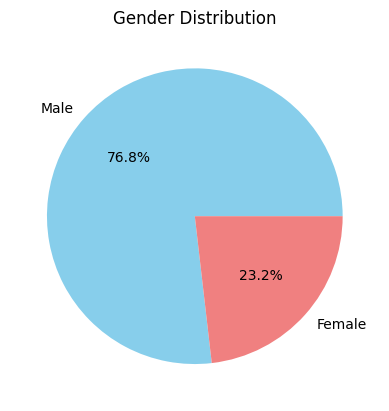

In [3]:
import matplotlib.pyplot as plt

# Example: Pie chart for 'gender' distribution
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], labels=['Male', 'Female'])
plt.title('Gender Distribution')
plt.ylabel('')  # Hide the y-axis label for a cleaner look
plt.show()


### Histograms for numerical variables(Salary):

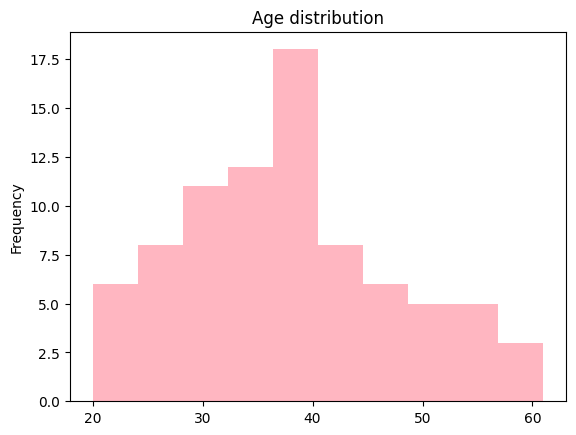

In [16]:
df['age'].plot(kind='hist', bins=10, color='lightpink')
plt.title('Age distribution')
plt.show()


### Boxplots for numerial variables(Salary):

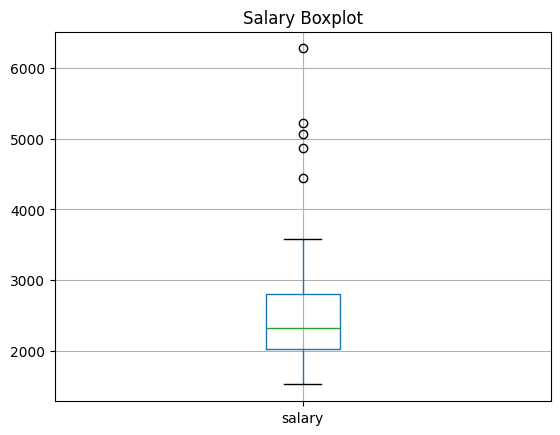

In [17]:
df.boxplot(column='salary')
plt.title('Salary Boxplot')
plt.show()


### Scatter Plot for numerical variable(Salary vs Age):

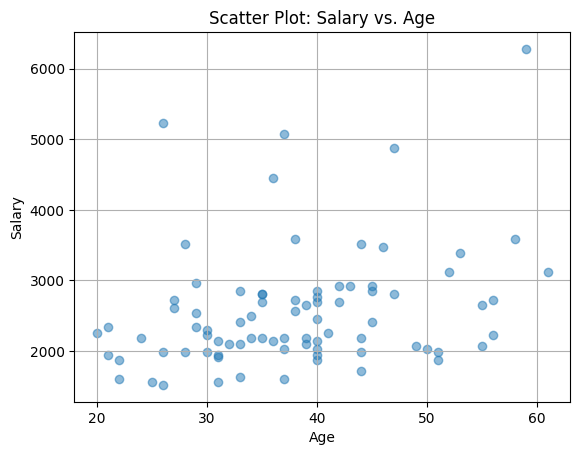

In [22]:
plt.scatter(df['age'], df['salary'], alpha=0.5)
plt.title('Scatter Plot: Salary vs. Age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid()
plt.show()

### Crosstab relationship shown in heatmap (Salary vs Satisfaction to Salary):

DataFrame Head:
   number  gender  age  family  education  years_of_service  salary  \
0       1       1   38       1        1.0              22.0    3587   
1       2       1   29       2        2.0              10.0    2963   
2       3       1   30       1        1.0               7.0    1989   
3       4       1   36       2        1.0              14.0    2144   
4       5       1   24       1        2.0               4.0    2183   

   sat_management  sat_colleques  sat_workingEnvironment  sat_salary  \
0               3            3.0                       3           3   
1               1            5.0                       2           1   
2               3            4.0                       1           1   
3               3            3.0                       3           3   
4               2            3.0                       2           1   

   sat_tasks  healtcare  holidayCabin  gym  muscleCare  
0          3        NaN           NaN  NaN         NaN  
1         

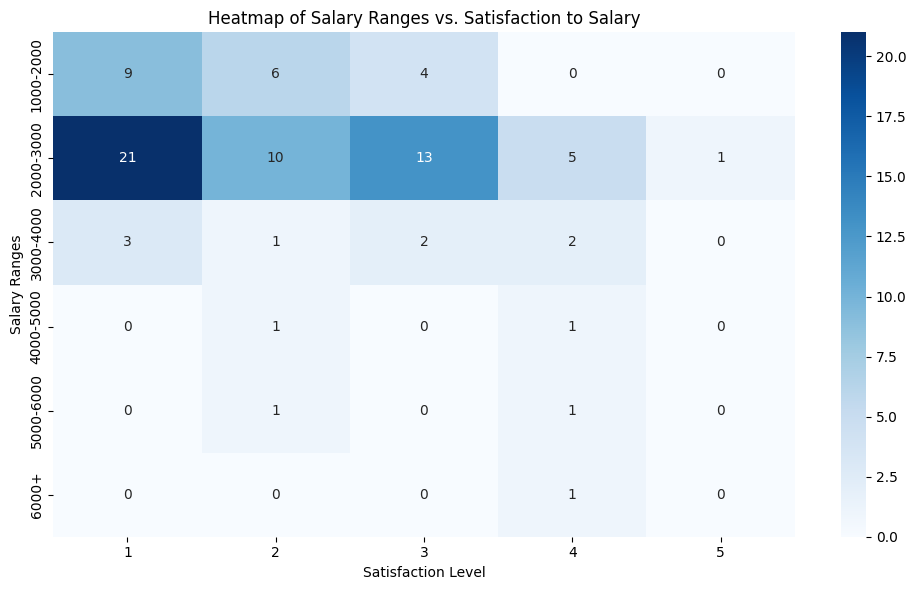

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

file_path = r'C:\Users\walidmazumder\Python Exercises\Data_Processing_Project\WorkPlaceSatisfactionSurveyData.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path)

print("DataFrame Head:")
print(df.head())

# Step 1: Create Salary Ranges
salary_bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, float('inf')]  # Add an upper edge
salary_labels = ['<1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000+']
df['salary_bins'] = pd.cut(df['salary'], bins=salary_bins, labels=salary_labels, right=False)

# Step 2: Crosstab: Salary Ranges vs. Satisfaction to Salary
crosstab_salary_satisfaction = pd.crosstab(df['salary_bins'], df['sat_salary'], margins=False)
print("\nCrosstab of Salary Ranges vs. Satisfaction to Salary:")
print(crosstab_salary_satisfaction)

# Step 3: Visualize with Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_salary_satisfaction, annot=True, fmt='d', cmap='Blues', cbar=True, 
            xticklabels=True, yticklabels=True)

# Customizing the plot
plt.title('Heatmap of Salary Ranges vs. Satisfaction to Salary')
plt.xlabel('Satisfaction Level')
plt.ylabel('Salary Ranges')
plt.tight_layout()
plt.show()



